## POE5 Chapter 2:  The Simple Linear Regression Model

In this Jupyter Notebook we'll work through an example economic model of the relationship between weekly housefold food expenditure and weekly household income.

First, we begin with the magic command ``%matplotlib inline`` so that our plots are displayed within this notebook.

In [1]:
%matplotlib inline

Next we will use _pandas_ and _Matplotlib_ to display our data.

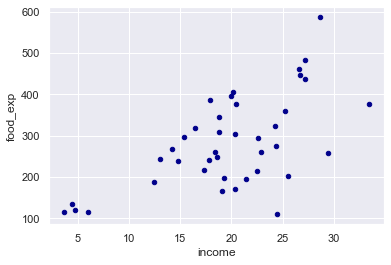

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_excel('food.xlsx')

ax = df.plot.scatter(x='income', y='food_exp',c='DarkBlue')

plt.show()

This dataset is small enough we could list the entire thing with ``df``, but for a larger dataset, we'd probably just want to list the first few lines, which we can do with slicing.  We can list the first five lines with ``df[0:5]``.

In [3]:
df.head()

,food_exp,income
0,115.22,3.69
1,135.98,4.39
2,119.34,4.75
3,114.96,6.03
4,187.05,12.47


If we only want to view the first few lines of ``food_exp``, we execute ``df['food_exp'][0:5]`` 


In [4]:
df['food_exp'].head()

0    115.22
1    135.98
2    119.34
3    114.96
4    187.05
Name: food_exp, dtype: float64

If we only want to list ``food_exp`` if ``income`` $\le\ 10$, we use


In [5]:
df['food_exp'][df.income<10]

0    115.22
1    135.98
2    119.34
3    114.96
Name: food_exp, dtype: float64

What if we want to list only those lines that satisfy ``income`` $> 10$ _and_ ``income`` $< 20$.  This is a little trickier, but only a little!

In [6]:
df[(df.income>10) & (df.income<15)]

,food_exp,income
4,187.05,12.47
5,243.92,12.98
6,267.43,14.20
7,238.71,14.76


We will come back to this, but let's have a look at our data.  We use the method ``.describe()`` to give summary statistics of our dataset.  The output shows us the column headers ``food_exp`` and ``income``, how many lines of data were read, and some statistics.


In [7]:
df.describe()

,food_exp,income
count,40.000000,40.000000
mean,283.573500,19.604750
std,112.675181,6.847773
min,109.710000,3.690000
25%,200.377500,17.110000
50%,264.480000,20.030000
75%,363.325000,24.397500
max,587.660000,33.400000


In [8]:
df.describe(percentiles=[0.1,0.2,0.5,0.8,0.9])

,food_exp,income
count,40.000000,40.000000
mean,283.573500,19.604750
std,112.675181,6.847773
min,109.710000,3.690000
10%,134.316000,11.826000
20%,192.890000,15.208000
50%,264.480000,20.030000
80%,378.946000,25.260000
90%,439.237000,27.142000
max,587.660000,33.400000


In [9]:
df.food_exp.median()

264.48

In [10]:
df.food_exp.var()

12695.696418205127

In [11]:
df.food_exp.skew()

0.511466010831957

In [12]:
df.food_exp.kurt()

-0.0024297554704717506

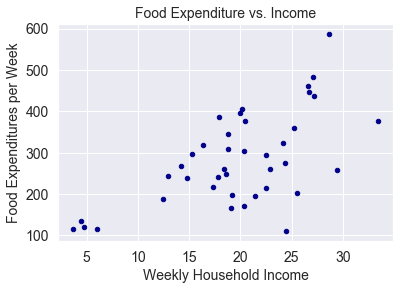

In [13]:
ax = df.plot.scatter(x='income', y='food_exp',fontsize=14,c='DarkBlue')

ax.set_xlabel("Weekly Household Income",fontsize=14)
ax.set_ylabel("Food Expenditures per Week",fontsize=14)
ax.set_title("Food Expenditure vs. Income",fontsize=14)
plt.show()

Text(0.5, 1.0, 'Food Expenditure vs. Income')

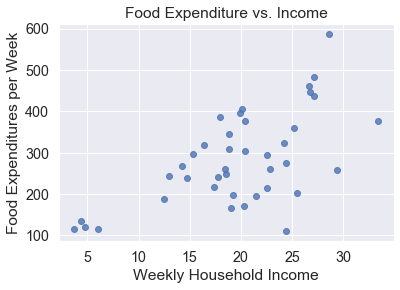

In [14]:
import seaborn as sns
sns.set(font_scale=1.3)
ax = sns.regplot(df.income,df.food_exp,fit_reg=False)
ax.set_xlabel("Weekly Household Income")
ax.set_ylabel("Food Expenditures per Week")
ax.set_title("Food Expenditure vs. Income")

Fit coefficients:
      β1 =83.42
      β2 =10.21


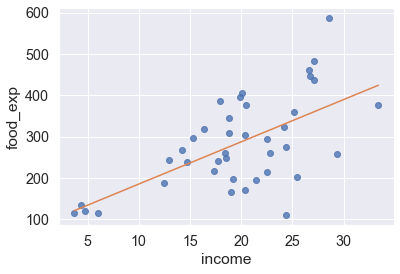

In [15]:
import numpy as np

c = np.polyfit(df.income,df.food_exp,1)
print(f"Fit coefficients:\n\
      β1 ={c[1]:.2f}\n\
      β2 ={c[0]:.2f}")

ax = sns.regplot(df.income,df.food_exp,fit_reg=False)
plt.plot(df.income,np.poly1d(c)(df.income))

Now we will find the best-fit line using statsmodels.OLS.  First, we import the package, then we define a constant column, and print the first few lines to confirm the action

In [16]:
import statsmodels.api as sm

df['const'] = 1
df.head()

,food_exp,income,const
0,115.22,3.69,1
1,135.98,4.39,1
2,119.34,4.75,1
3,114.96,6.03,1
4,187.05,12.47,1


Call statsmodel.OLS and print the solution.  Note that we're using pandas dataframes here, but we could just as well use lists or arrays.

In [17]:
reg = sm.OLS(endog=df['food_exp'],exog=df[['const','income']])

results = reg.fit()

print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.369   
Dependent Variable: food_exp         AIC:                475.0176
Date:               2020-05-14 00:23 BIC:                478.3954
No. Observations:   40               Log-Likelihood:     -235.51 
Df Model:           1                F-statistic:        23.79   
Df Residuals:       38               Prob (F-statistic): 1.95e-05
R-squared:          0.385            Scale:              8013.3  
-------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.025    0.975] 
-------------------------------------------------------------------
const     83.4160    43.4102   1.9216   0.0622   -4.4633   171.2953
income    10.2096     2.0933   4.8774   0.0000    5.9721    14.4472
-----------------------------------------------------------------
Omnibus:               0.277        Durbin-Watson:          1.894
Prob(Omnibus):   

With the results at hand, we can now output our original data with our best fit line (which is identical to our line above, of course).

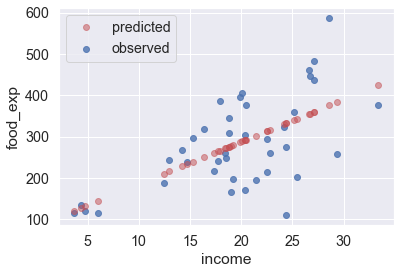

In [18]:
ax = sns.regplot(df.income,df.food_exp,fit_reg=False,label="observed")
plt.plot(df.income,results.predict(),'ro',alpha=0.5,label="predicted")
plt.legend()

Text(0, 0.5, 'residuals')

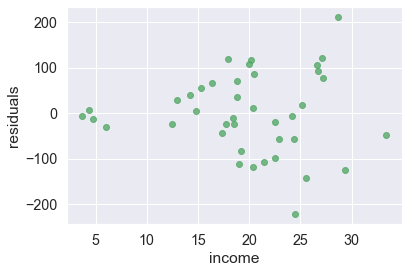

In [19]:
residuals = df.food_exp - results.predict()

ax = sns.regplot(df.income,residuals,fit_reg=False,color='g')
ax.set_ylabel("residuals")

Below is a complete example of how to read in the data, do the fit, and output the results.

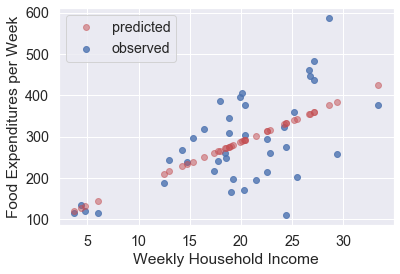

In [20]:
%matplotlib inline

import pandas as pd               # Import all needed packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_excel('food.xlsx')   # Read in our data

sns.set(font_scale=1.3)           # Plot the data
ax = sns.regplot(df.income,df.food_exp,fit_reg=False,label="observed")
ax.set_xlabel("Weekly Household Income")
ax.set_ylabel("Food Expenditures per Week")

df['const'] = 1                   # fit line and plot 
results = sm.OLS(endog=df['food_exp'],exog=df[['const','income']]).fit()
plt.plot(df.income,results.predict(),'ro',alpha=0.5,label="predicted")
plt.legend()

#print(results.summary())          # Output summary results

In [21]:
print(results.params)

const     83.416002
income    10.209643
dtype: float64


In [22]:
print(results.bse)

const     43.410163
income     2.093264
dtype: float64


In [23]:
def predict(income):
    slope = results.params.income
    intercept = results.params.const
    return intercept + slope*income

print(predict(20))                  # predict for a single value

newincome = np.array([5,10,20,40])  # predict for a new sample of values
print(predict(newincome))

287.60886138314925
[134.46421686 185.5124317  287.60886138 491.80172075]


In [24]:
results.params.income * np.mean(df.income)/np.mean(df.food_exp)

0.705839925025577

In [25]:
results.params.income

10.209642968119484

In [26]:
np.mean(df.income)

19.604750000000003

In [27]:
np.mean(df.food_exp)

283.5735

In [28]:
10.2096*19.605/283.57

0.7058546672779208

In [29]:
results.cov_params()



,const,income
const,1884.442263,-85.903157
income,-85.903157,4.381752
